# Setting up the scattering medium

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')

import sys
sys.path.insert(1, '../')
import src.core.scatterer as scatterer

/var/folders/k7/yq0x0lnn2ns__6748g658mxm0000gn/T/ipykernel_44250/3477911115.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Random scattering medium example

In [2]:
wavelength = 632.8E-3
scattering_degree = 2
g_percent = [1.0]
bounds = np.array([[-5, 5], [-5, 5], [-0.5, 0.5]])
surround_index = 1.33
radius = 0.06969697
size_param = 2 * np.pi * radius * surround_index / wavelength
print(f'size param: {size_param}')
structure = 'random'
particle_index = 2.488  # polystyrene in water

# initialize scattering medium
scat_medium = scatterer.RandomScatteringMedium(bounds=bounds,
                                               particle_radius=radius,
                                               size_param=size_param,
                                               scattering_degree=scattering_degree,
                                               particle_index=particle_index,
                                               env_index=surround_index,
                                               no_overlaps=False)

size param: 0.9204049313406849


TypeError: __init__() got an unexpected keyword argument 'particle_radii'

In [ ]:
xs, ys, zs = scat_medium.particle_centers

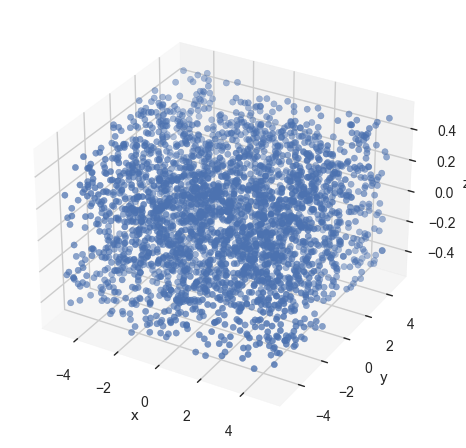

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_zlabel(r'z')
plt.savefig('random.png', dpi=300)

In [ ]:
new_angles = scat_medium.gen_mie(size=1000)
new_angles = new_angles

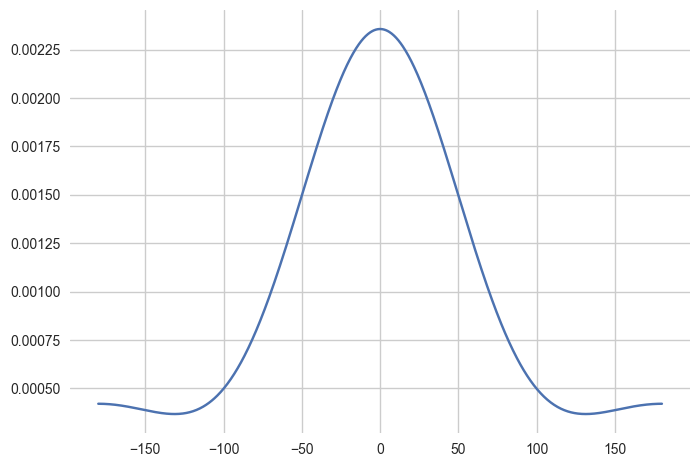

In [ ]:
plt.plot(scat_medium.thetarange, scat_medium.scat_dist)

## Lattice scattering medium example

For cuboid geometries,
\begin{equation}
    \rho_\text{particles} = \frac{N_\text{particles}}{V_\text{medium}}, \quad
    V_\text{ccell} = a_1 \times a_2 \times a_3, \quad
    N_\text{particles per ccell} = 1. 
\end{equation}
The number of conventional cells $N_\text{ccell}$ in the medium defined by bounds along x, y, and z is given by 
\begin{equation}
    N_\text{ccell} = \frac{V_\text{medium}}{V_\text{ccell}}
\end{equation}
and the total number of lattice points in the medium is given by 
\begin{equation}
    N_\text{particles} = N_\text{ccell} \times N_\text{particles per ccell}.
\end{equation}
We want to generate the lattice constants $a_1, a_2, a_3$ given the density per unit volume in microns, the volume of the medium, and the number of particles per conventional cell. 
\begin{equation}
    \rho_\text{particles} = \frac{N_\text{particles}}{V_\text{medium}} \\
    \rho_\text{particles} V_\text{medium} = N_\text{particles} \\
    \rho_\text{particles} V_\text{medium} = N_\text{ccell} \times N_\text{particles per ccell} \\
    \rho_\text{particles} V_\text{medium} = \frac{V_\text{medium}}{V_\text{ccell}} \times N_\text{particles per ccell} \\
    \rho_\text{particles} = \frac{N_\text{particles per ccell}}{V_\text{ccell}} =  \frac{N_\text{particles per ccell}}{a_1 a_2 a_3}\\
    a_1 a_2 a_3 = \frac{N_\text{particles per ccell}}{\rho_\text{particles}} = \frac{N_\text{particles per ccell}}{N_\text{particles}} V_\text{medium}.
\end{equation}
This is the equation for the lattice constants for an orthorhombic lattice, where $a_1 \neq a_2 \neq a_3.$
For a simple cubic lattice, $a_1 = a_2 = a_3 = a$, so 
\begin{equation}
    a^3 = \frac{N_\text{particles per ccell}}{\rho_\text{particles}}.
\end{equation}
For a tetragonal lattice, $a_1 = a_2 \neq a_3 $, so
\begin{equation}
    a_1^2a_3 = \frac{N_\text{particles per ccell}}{\rho_\text{particles}}.
\end{equation}

The choice for $a_1, a_2, a_3$ is limited only by the geometry of the lattice and the particle radii $r_1, r_2$ (assuming there are two alternating atoms) where
\begin{equation}
    a_i \geq r_1 + r_2 \quad \text{for } i = 1, 2, 3. 
\end{equation}

In [ ]:
# set scattering medium parameters
glist = [0.1]
g_tag = int(glist[0] * 10)
g_percent = [1.0]
bounds = np.array([[-10, 10], [-10, 10], [-1, 1]])
radius = 100E-3 # 100 nanometers. everything is in microns
structure = 'cubic'
a1 = 1
N = 10
# d_s = 1 / (particle density * scattering cross section) where
# the scattering cross section of a hard sphere is pi radius**2

### Simple Cubic

In [ ]:
# initialize scattering medium with lattice constants
lattice_constants = (a1, a1, a1)
sc = scatterer.LatticeScatteringMedium(
    bounds=bounds, 
    lattice_constants=lattice_constants, 
    space_structure=structure,
    particle_radii=radius,
    size_param=size_param,
    particle_index=particle_index,
    env_index=surround_index
)
a, angles = sc.cuboid()

AttributeError: 'LatticeScatteringMedium' object has no attribute 'scattering_degree'

In [ ]:
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
nx, ny, nz = bounds / a1
space_lattice = sc.create_space_lattice(a, 5)

In [ ]:
sc_centers = sc.ravel_ijk(space_lattice)


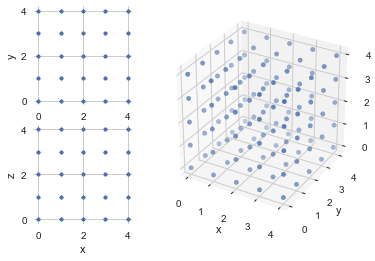

In [ ]:
sc.plot(sc_centers)
pl.savefig('sc.png', dpi=300)

-12.0


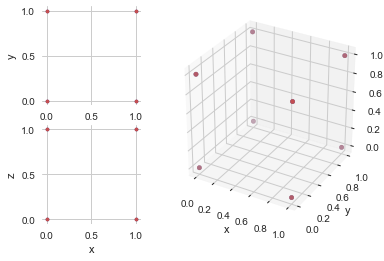

In [ ]:
sc.plot(*sc.get_conventional_cell())
pl.savefig('sc-convcell.png', dpi=300)

### Body-centered cubic

In [ ]:
basis = np.ones(shape=(3,)) / 2
basis

array([0.5, 0.5, 0.5])

In [ ]:
# initialize scattering medium with lattice constants
lattice_constants = (a1, a1, a1)
bcc = scatterer.LatticeScatteringMedium(bounds=bounds, lattice_constants=lattice_constants, 
                                         space_structure=structure, basis_structure=basis,
                                         particle_radii=radius, size_param=size_param, )
                 conv_cell=False
a, angles = bcc.cuboid()
nx, ny, nz = bounds / a1
space_lattice = bcc.create_space_lattice(a, 5)
basis_lattice = bcc.create_basis_lattice()

576.0


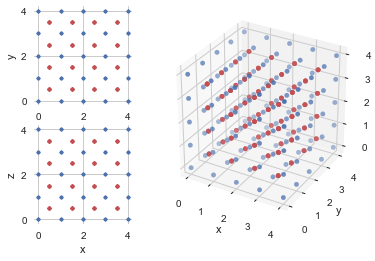

In [ ]:
bcc.plot(bcc.ravel_ijk(space_lattice), basis_lattice)
pl.savefig('bcc.png', dpi=300)

-4.5


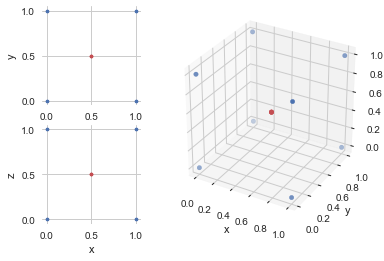

In [ ]:
bcc.plot(*bcc.get_conventional_cell())
pl.savefig('bcc-convcell.png', dpi=300)

### Face-centered cubic

In [ ]:
basis = np.zeros(shape=(3, 3))

In [ ]:
basis[0] = 0, 1/2, 1/2
basis[1] = 1/2, 0, 1/2
basis[2] = 1/2, 1/2, 0 

In [ ]:
# initialize scattering medium with lattice constants
lattice_constants = (a1, a1, a1)
fcc = scatterer.LatticeScatteringMedium(bounds=bounds, lattice_constants=lattice_constants, 
                                         space_structure=structure, basis_structure=basis,
                                         particle_radii=radius)
a, angles = fcc.cuboid()
nx, ny, nz = bounds / a1
space_lattice = fcc.create_space_lattice(a, 5)
basis_lattice = fcc.create_basis_lattice()

720.0


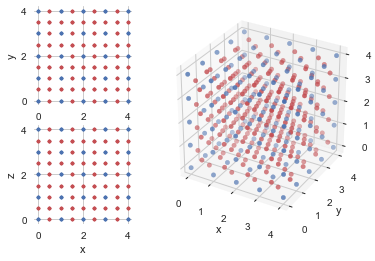

In [ ]:
fcc.plot(fcc.ravel_ijk(space_lattice), basis_lattice)
pl.savefig('fcc.png', dpi=300)

-9.0


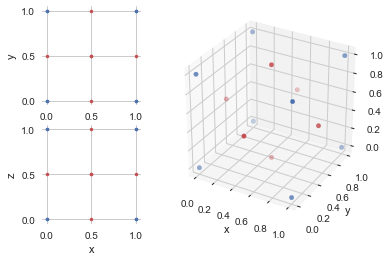

In [ ]:
fcc.plot(*fcc.get_conventional_cell())
pl.savefig('fcc-convcell.png', dpi=300)